In [690]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [691]:
df = pd.read_csv('top_insta_influencers_data.csv')

In [692]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [693]:
# Setei o rank como index do dataset
df = df.set_index('rank')

In [694]:
# Tive que usar o dropna porque existe valores na coluna country NaN
countrys = sorted(df['country'].dropna().unique())
countrys

['Anguilla',
 'Australia',
 'Brazil',
 'British Virgin Islands',
 'Canada',
 'Colombia',
 'Czech Republic',
 "CÃ´te d'Ivoire",
 'France',
 'Germany',
 'India',
 'Indonesia',
 'Italy',
 'Mexico',
 'Netherlands',
 'Puerto Rico',
 'Russia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'United Arab Emirates',
 'United Kingdom',
 'United States',
 'Uruguay']

In [695]:
# Criei um dataset e coloquei apenas os países existem no dataset 
continent_mapping = {
    'South America': {
        'Brazil': 1, 'Colombia': 2, 'Uruguay': 3
    },
    'North America': {
        'Canada': 20, 'Mexico': 21, 'United States': 22, 'Puerto Rico': 23, 'Anguilla': 24, 'British Virgin Islands': 25
    },
    'Europe': {
        'France': 40, 'Germany': 41, 'Czech Republic': 42, 'Italy': 43, 'Netherlands': 44, 'Russia': 45, 
        'Spain': 46, 'Sweden': 47, 'Switzerland': 48, 'United Kingdom': 49, 'Turkey': 50
    },
    'Asia': {
        'India': 60, 'Indonesia': 61, 'United Arab Emirates': 62
    },
     'African': {
        "CÃ´te d'Ivoire": 80
    },
    'Oceania': {
        'Australia': 90
    }
}

In [696]:
# Função para realizar a conversão de categorico para númerico utilizando 
def country_to_continent_mapping(country):
    for continent, countries in continent_mapping.items():
        if country in countries:
            return countries[country]
    return None  

In [697]:
# Aplica a transformação da coluna 'country' usando a função map_country_to_continent
df['country'] = df['country'].map(country_to_continent_mapping)

In [698]:
df['country']

rank
1      46.0
2      22.0
3       NaN
4      22.0
5      22.0
       ... 
196    22.0
197    40.0
198     1.0
199    22.0
200    61.0
Name: country, Length: 200, dtype: float64

In [699]:
def convert_posts(value):
    if isinstance(value, str):
        if 'm' in value:
            return float(value.replace('m', '')) * 1_000_000
        elif 'k' in value:
            return float(value.replace('k', '')) * 1_000
        elif 'b' in value:
            return float(value.replace('b', '')) * 1_000_000_000
        else:
            return float(value)
    else:
        return value

In [700]:
df['posts'] = df['posts'].apply(convert_posts)
df['followers'] = df['followers'].apply(convert_posts)
df['avg_likes'] = df['avg_likes'].apply(convert_posts)
df['new_post_avg_like'] = df['new_post_avg_like'].apply(convert_posts)
df['total_likes'] = df['total_likes'].apply(convert_posts)

# Converter a taxa de engajamento para um número decimal
df["60_day_eng_rate"] = df["60_day_eng_rate"].replace("%", "", regex=True)
df["60_day_eng_rate"] = df["60_day_eng_rate"].astype(float) / 100

# Análise Exploratória de Dados 

## Distribuição das Variáveis Númericas

In [703]:
# Seleciono todas as colunas numéricas do dataset
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns

Index(['influence_score', 'posts', 'followers', 'avg_likes', '60_day_eng_rate',
       'new_post_avg_like', 'total_likes', 'country'],
      dtype='object')

### Histogramas

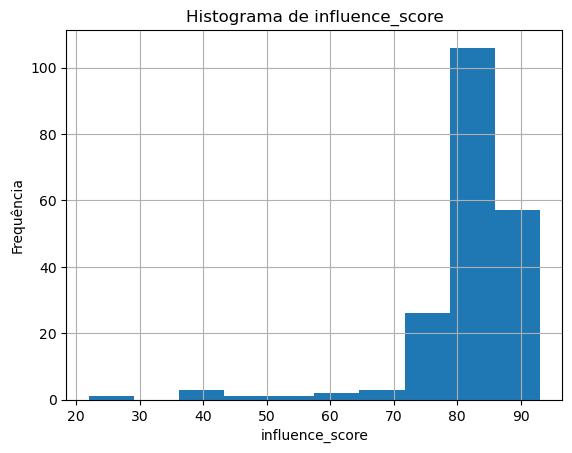

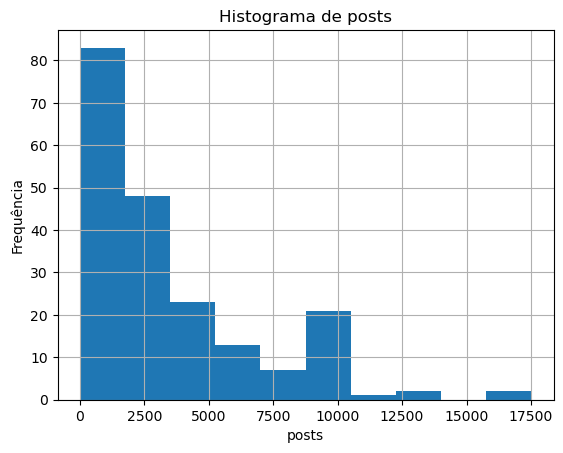

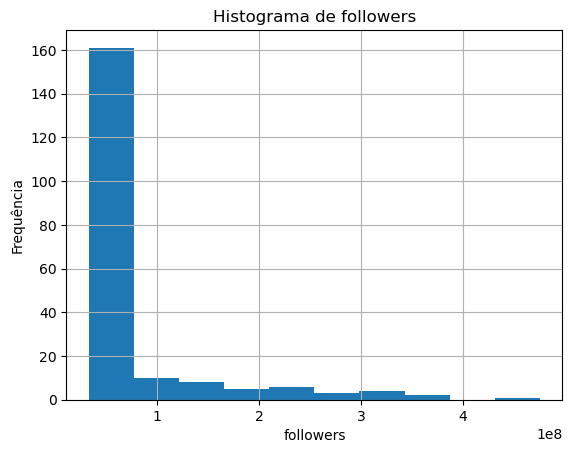

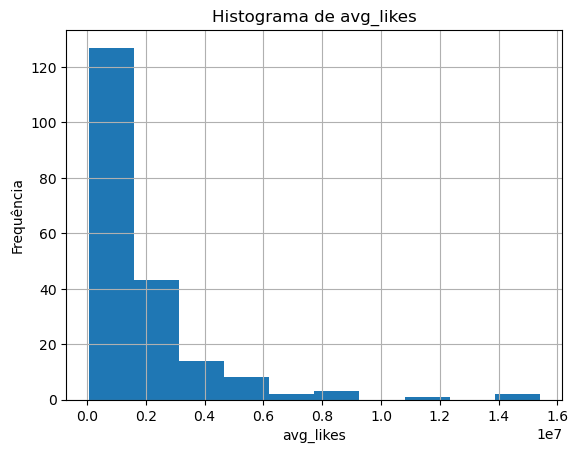

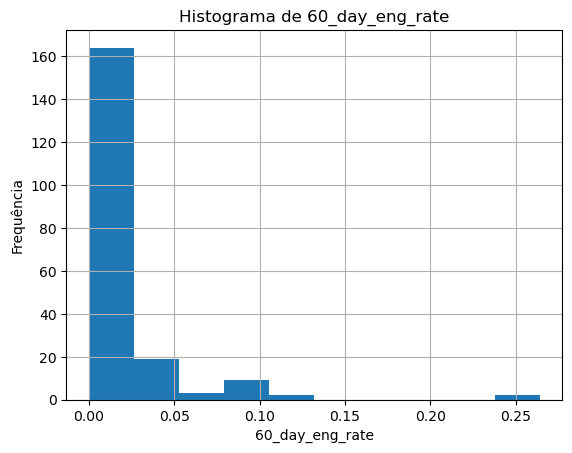

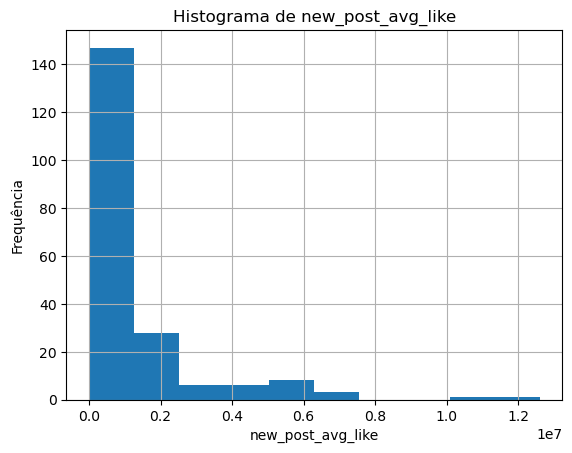

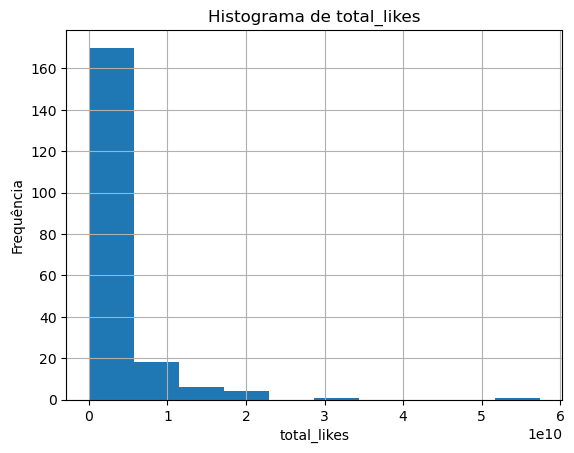

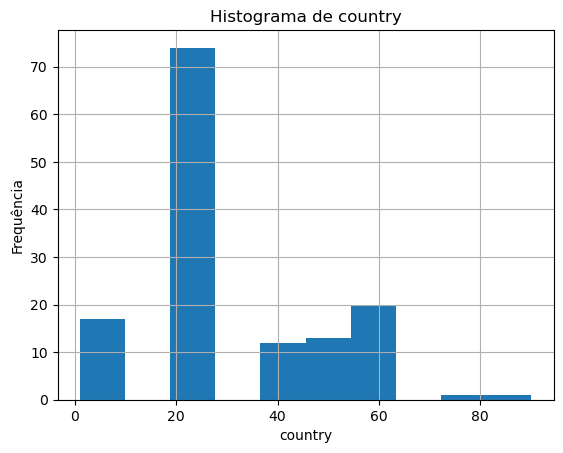

In [705]:
# Iterar sobre todas as colunas numéricas e plotar os histogramas
for column in numeric_columns:
    # Coloquei em intervalos de 10
    df[column].hist(bins=10)
    plt.title(f"Histograma de {column}")
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.show()

### Boxplots

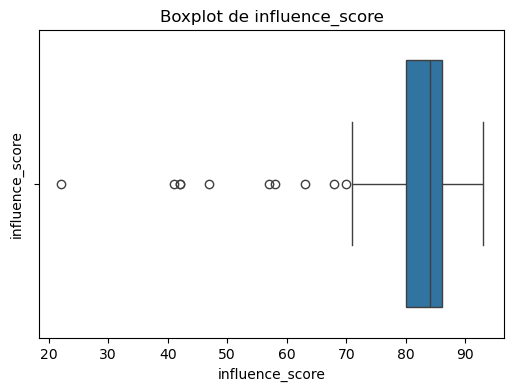

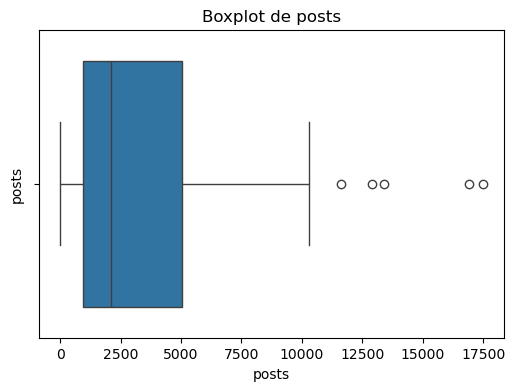

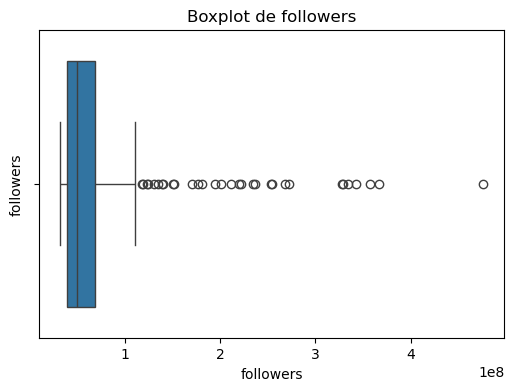

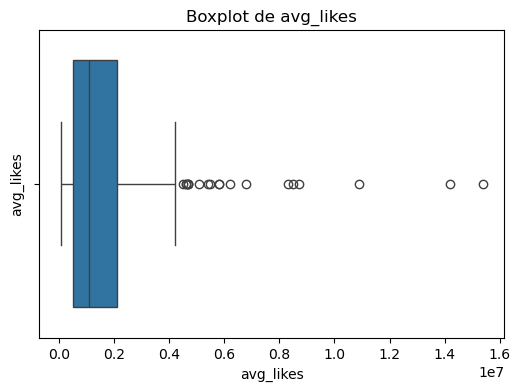

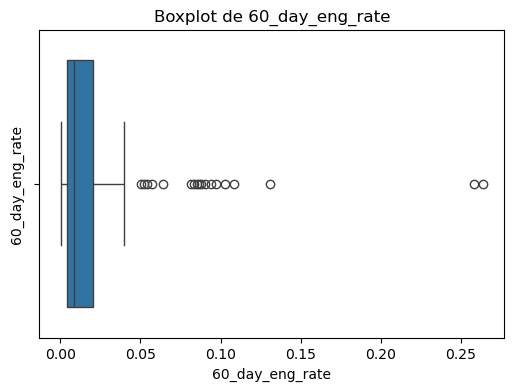

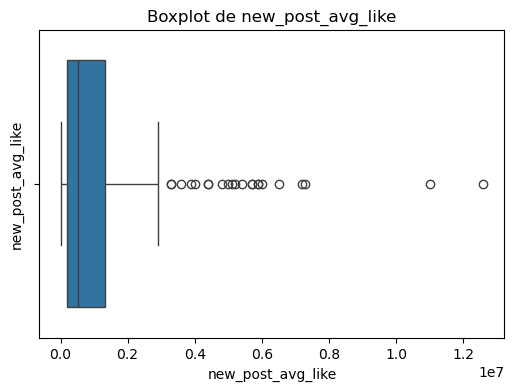

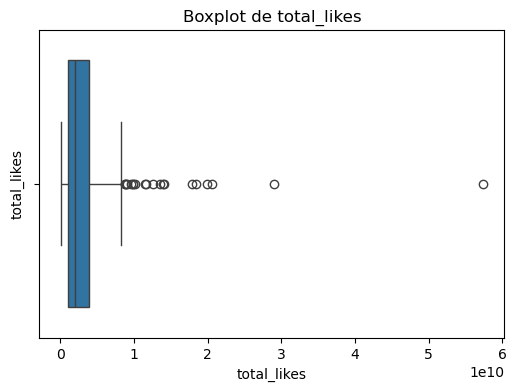

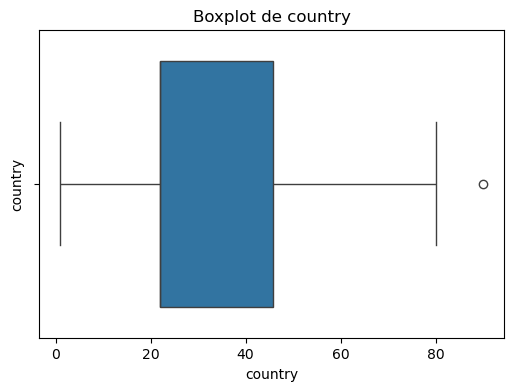

In [707]:
for column in numeric_columns:
    plt.figure(figsize=(6, 4))  # Tamanho da figura
    sns.boxplot(data=df, x=column)
    plt.title(f"Boxplot de {column}")
    plt.ylabel(column)
    plt.show()

**Interpretação:** Com os histogramas é possível perceber uma maior frequência de valores em intervalos específicos e alguns intervalos não possuem valores, além disso, as colunas posts, followers, avg_likes, total_likes, 60_day_eng_rate e new_post_avg_like possuem assimetria positiva. No boxplot é obersavado a existência de outliers em todas as colunas do dataset.

## Relação entre Variáveis Númericas

### Matriz de Correlação

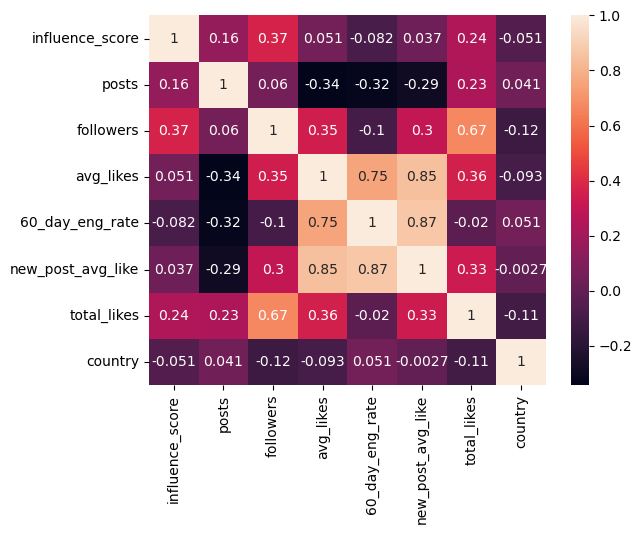

In [711]:
# Calcula a matriz de correlação
corr_matrix = df[numeric_columns].corr()

# Visualize a matriz de correlação
sns.heatmap(corr_matrix, annot=True)
plt.show()

**Interpretação:** É possível observar que 60_day_eng_rate e new_post_avg_like são às colunas que possuem maior correlação com avg_likes. Também existe alta correlação entre elas.

### Gráficos de Dispersão (Scatter Plot)

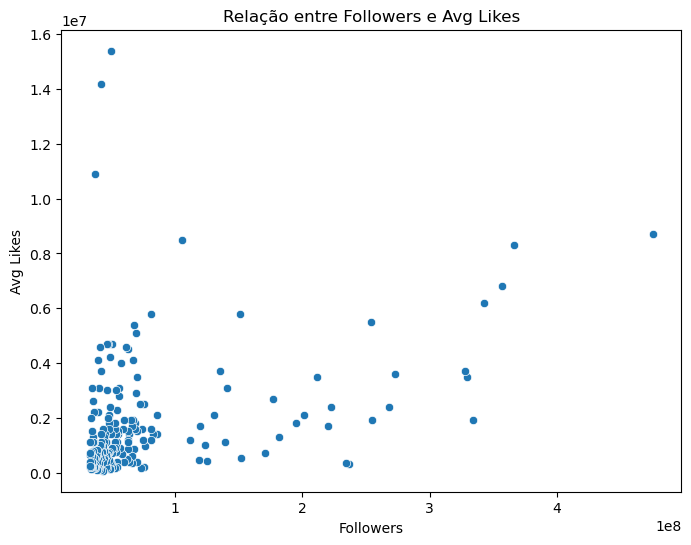

In [714]:
# Gráfico de dispersão entre followers e avg_likes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='followers', y='avg_likes')
plt.title("Relação entre Followers e Avg Likes")
plt.xlabel("Followers")
plt.ylabel("Avg Likes")
plt.show()

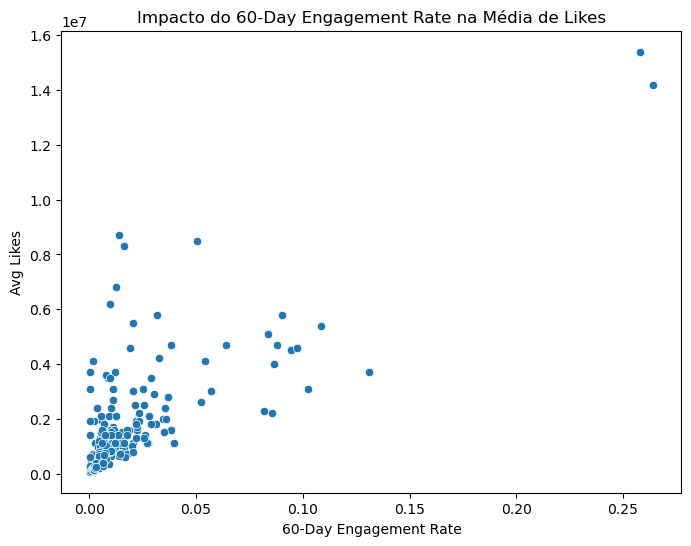

In [715]:
# Gráfico de dispersão entre 60_day_eng_rate e avg_likes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='60_day_eng_rate', y='avg_likes')
plt.title("Impacto do 60-Day Engagement Rate na Média de Likes")
plt.xlabel("60-Day Engagement Rate")
plt.ylabel("Avg Likes")
plt.show()

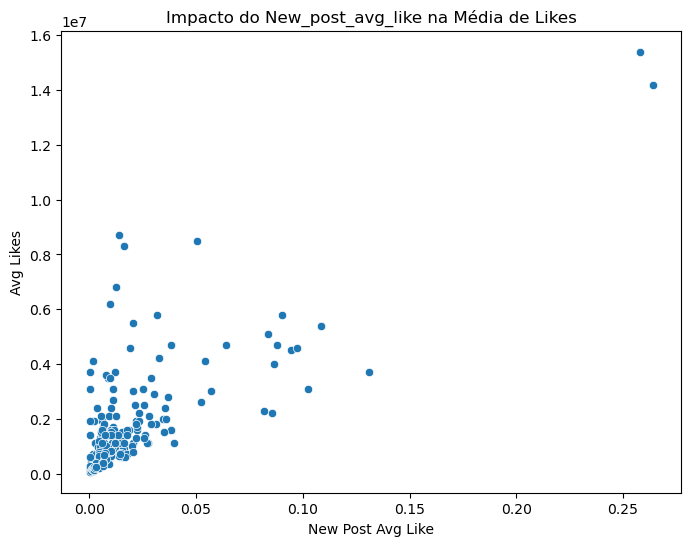

In [716]:
# Gráfico de dispersão entre new_post_avg_lie e avg_likes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='60_day_eng_rate', y='avg_likes')
plt.title("Impacto do New_post_avg_like na Média de Likes")
plt.xlabel("New Post Avg Like")
plt.ylabel("Avg Likes")
plt.show()

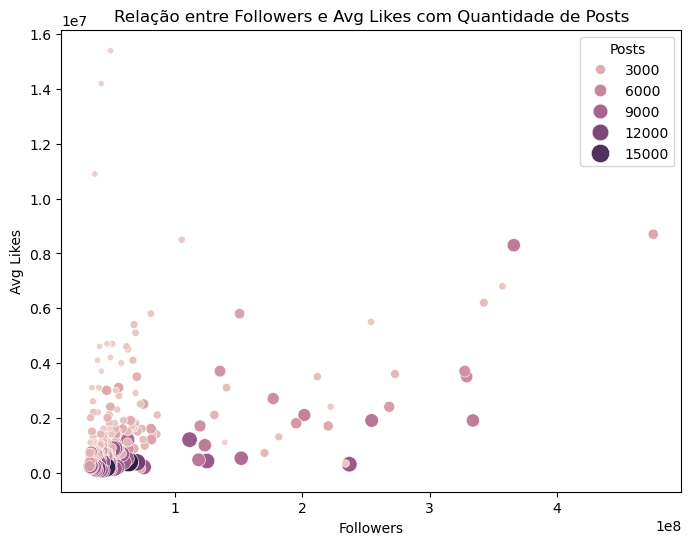

In [717]:
# Gráfico de dispersão com uma terceira variável
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='followers', y='avg_likes', hue='posts', size='posts', sizes=(20, 200))
plt.title("Relação entre Followers e Avg Likes com Quantidade de Posts")
plt.xlabel("Followers")
plt.ylabel("Avg Likes")
plt.legend(title="Posts")
plt.show()

**Interpretação:** No gráfico de followers x avg_likes vemos que quanto mais followers, maior a avg_likes. No gráfico 60_day_eng_rate x avg_likes é notável também que quanto maior a taxa de engajamento do perfil, maior a média de curtidas, em new_post_avg_like x avg_likes também é observado esse fato. No último gráfico foi adicionado uma terceira váriavel (posts) para observar qual séria a relação entre ela e followers x avg_likes. Nesse gráfico é perceptível que perfis com pouco followers, além de terem uma baixa média de likes, também possuem poucos posts.

## Tratamento de Valores NaN

In [720]:
# O KNN não pode ser implementado enquanto houver valores NaN no dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   channel_info       200 non-null    object 
 1   influence_score    200 non-null    int64  
 2   posts              200 non-null    float64
 3   followers          200 non-null    float64
 4   avg_likes          200 non-null    float64
 5   60_day_eng_rate    199 non-null    float64
 6   new_post_avg_like  200 non-null    float64
 7   total_likes        200 non-null    float64
 8   country            138 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 15.6+ KB


In [721]:
# Com o df.info podemos perceber que a coluna country possui possui valores NaN e 60_day_eng_rate possui apenas um valor NaN

# Irei testar o comportamento da coluna country quando eu atribuo aos 62 valores NaN a moda da coluna
country_test_mode = df['country'].fillna(df['country'].mode()[0])

# Não dropei o valor NaN da taxa de engajamento, ao invés disso atribuí a mediana
df['60_day_eng_rate'] = df['60_day_eng_rate'].fillna(df['60_day_eng_rate'].median())

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   channel_info       200 non-null    object 
 1   influence_score    200 non-null    int64  
 2   posts              200 non-null    float64
 3   followers          200 non-null    float64
 4   avg_likes          200 non-null    float64
 5   60_day_eng_rate    200 non-null    float64
 6   new_post_avg_like  200 non-null    float64
 7   total_likes        200 non-null    float64
 8   country            138 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 15.6+ KB


### Histograma e Boxplot de Country

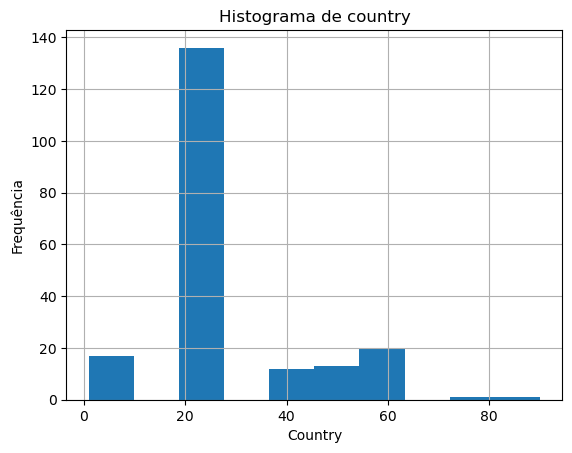

In [723]:

# Coloquei em intervalos de 10
country_test_mode.hist(bins=10)
plt.title(f"Histograma de country")
plt.xlabel('Country')
plt.ylabel('Frequência')
plt.show()

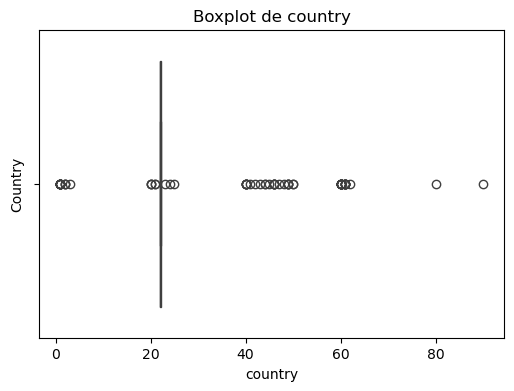

In [725]:
plt.figure(figsize=(6, 4))  # Tamanho da figura
sns.boxplot(x=country_test_mode)  # Passando diretamente a Série para o x
plt.title("Boxplot de country")
plt.ylabel('Country')
plt.show()

### Distribuição de Country (Sem substituição e Com substituição pela moda)

country
22.0    66
1.0     13
60.0    12
61.0     7
40.0     6
46.0     5
49.0     4
2.0      3
20.0     3
21.0     2
50.0     2
44.0     2
48.0     1
41.0     1
42.0     1
25.0     1
47.0     1
90.0     1
24.0     1
80.0     1
23.0     1
62.0     1
43.0     1
3.0      1
45.0     1
Name: count, dtype: int64


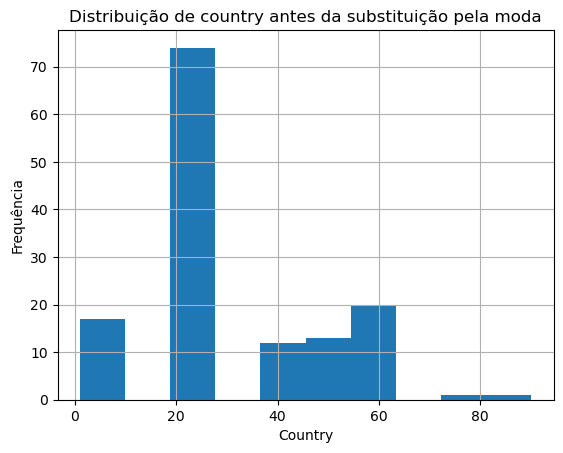

In [733]:
print(df['country'].value_counts())
df['country'].hist(bins=10)
plt.title("Distribuição de country antes da substituição pela moda")
plt.xlabel('Country')
plt.ylabel('Frequência')
plt.show()

country
22.0    128
1.0      13
60.0     12
61.0      7
40.0      6
46.0      5
49.0      4
2.0       3
20.0      3
21.0      2
50.0      2
44.0      2
48.0      1
41.0      1
42.0      1
25.0      1
47.0      1
90.0      1
24.0      1
80.0      1
23.0      1
62.0      1
43.0      1
3.0       1
45.0      1
Name: count, dtype: int64


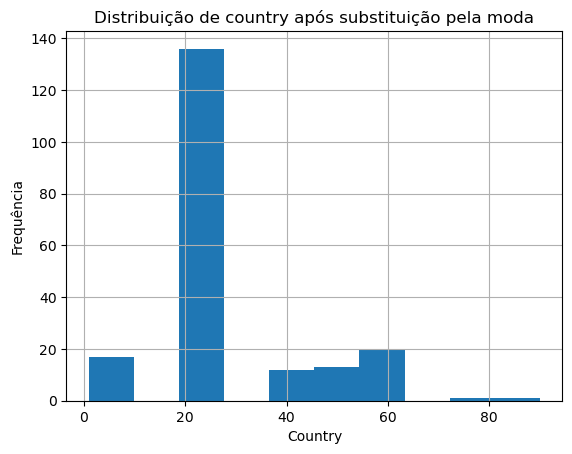

In [735]:
print(country_test_mode.value_counts())
country_test_mode.hist(bins=10)
plt.title("Distribuição de country após substituição pela moda")
plt.xlabel('Country')
plt.ylabel('Frequência')
plt.show()

**Interpretação:** Como podemos observar nos gráficos, especialmente no boxplot, a substituição de valores NaN pela moda não agrega valor significativo à distribuição da variável. Na realidade, ocorre o oposto: a substituição pela moda resulta em um aumento excessivo de valores concentrados em torno de um único valor (a moda), o que pode prejudicar a qualidade do modelo. Isso ocorre porque, no contexto de um modelo como o KNN, essa concentração pode introduzir uma distorção nas distâncias calculadas, tornando-as mais semelhantes entre os pontos que possuem a moda como valor.

# Implementação do Algoritmo

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['avg_likes', 'channel_info'])
y = df['avg_likes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)

## Padronização das Variáveis Independentes

## Desenvolvimento do KNN (Implementação e configuração)

## Validação Cruzada e depois mostrar uns gráficos

# Otimização e Ajustes (Otimização de Hiperparâmetros: Realize ajustes no modelo usando GridSearchCV para encontrar os melhores valores de k, Normalização de Dados: Avalie o impacto da normalização das variáveis, especialmente followers, avg_likes, e total_likes, para melhorar o desempenho. Dropar NaNs, Analisar uma possibilidade de lidar com Asia, Oceania e Africa.

In [ ]:
## Avaliação do modelo usando às métricas do KNN e permitir visualização entre os valores reais X previstos e visualização dos resíduos

In [ ]:
## Validação Cruzada

# Análise e Visualizaçao dos Resultados (métricas de avaliação - MAE, MSE e RMSE) e visualizações gráficas para ilustrar o comportamento do modelo, como gráficos de dispersão de followers vs avg_likes, gráficos de barras comparando 